This is an implementation that repeats the code but includes the visual part of the task

In [31]:
import numpy as np

# 1. Linear hypothesis function
def h(x, theta):
    return np.dot(x, theta).reshape(-1, 1)

In [32]:
# 2. Mean squared error function
def mean_squared_error(y_predicted, y_label):
    return np.mean((y_predicted - y_label) ** 2)

In [33]:
# 3. Bias column function
def bias_column(X):
    return np.c_[np.ones((X.shape[0], 1)), X]

In [34]:
# 4. Least squares regression class
class LeastSquaresRegression():
    def __init__(self):
        self.theta_ = None

    def fit(self, X, y):
        # Normal Equation: theta = (X^T * X)^(-1) * X^T * y
        X_transpose = X.T
        self.theta_ = np.linalg.inv(X_transpose.dot(X)).dot(X_transpose).dot(y)

    def predict(self, X):
        return h(X, self.theta_)

In [35]:
import numpy as np
import matplotlib.pyplot as plt

X = 4 * np.random.rand(100, 1)
y = 10 + 2 * X + np.random.randn(100, 1)

In [36]:
X_new = bias_column(X)

print(X[:5])
print(" ---- ")
print(X_new[:5])

[[3.94654232]
 [0.06562198]
 [0.05882957]
 [1.22056312]
 [3.9701574 ]]
 ---- 
[[1.         3.94654232]
 [1.         0.06562198]
 [1.         0.05882957]
 [1.         1.22056312]
 [1.         3.9701574 ]]


In [37]:
model = LeastSquaresRegression()
model.fit(X_new, y)

print(model.theta_)

[[10.04544507]
 [ 1.95461432]]


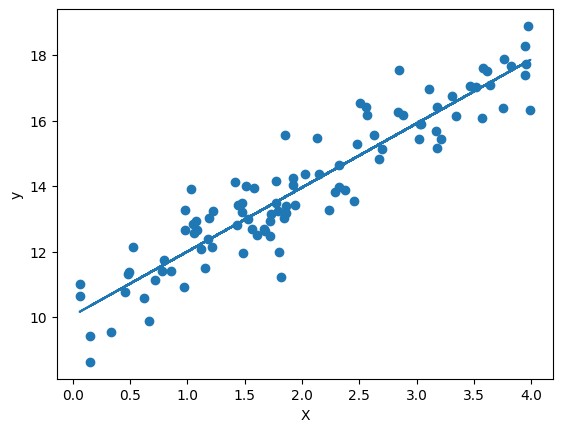

In [38]:
y_new = model.predict(X_new)
def my_plot(X, y, y_new):
    plt.xlabel('X')
    plt.ylabel('y')
    plt.scatter(X, y)
    plt.plot(X, y_new)
    plt.show()

my_plot(X, y, y_new)

In [39]:
# 5. Gradient Descent Optimizer class
class GradientDescentOptimizer():
    def __init__(self, f, fprime, start, learning_rate=0.1):
        start = start.reshape(-1, 1)
        self.f_ = f
        self.fprime_ = fprime
        self.current_ = start
        self.learning_rate_ = learning_rate
        self.history_ = [start.flatten()]

    def step(self):
        gradient = self.fprime_(self.current_)
        self.current_ -= self.learning_rate_ * gradient
        self.history_.append(self.current_.flatten())

    def optimize(self, iterations=100):
        for _ in range(iterations):
            self.step()

    def getCurrentValue(self):
        return self.current_

    def print_result(self):
        print("Best theta found is " + str(self.current_))
        print("Value of f at this theta: f(theta) = " + str(self.f_(self.current_)))
        print("Value of f prime at this theta: f'(theta) = " + str(self.fprime_(self.current_)))

    def plot_it(self):
        fig = plt.figure(figsize = (5,5))
        ax = plt.axes(projection='3d')

        history_vec = np.array(self.history_)
        xmin, xmax = -2, 6
        ymin, ymax = 2, 10

        x = np.arange(xmin, xmax, 0.1)
        y = np.arange(ymin, ymax, 0.1)

        X, Y = np.meshgrid(x, y)
        Z = np.array([[self.f_(np.array([x0,y0]).reshape(-1, 1))[0, 0] for x0 in x] for y0 in y])

        x_grad, y_grad = tuple(history_vec.T)
        X_grad, Y_grad = np.meshgrid(x_grad, y_grad)
        Z_grad = self.f_(np.array([x_grad, y_grad])).diagonal()
        surf = ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.7)
        ax.scatter(x_grad, y_grad, Z_grad, color='black', s=3, edgecolor='black', depthshade=False)

        # Calculate the arrow components (differences between consecutive points)
        dx = np.diff(x_grad)
        dy = np.diff(y_grad)
        dz = np.diff(Z_grad)

        ax.quiver(
            x_grad[:-1], y_grad[:-1], Z_grad[:-1],  # Starting points of arrows
            dx, dy, dz,  # Directions of arrows (differences)
            color='black',
            linewidth=0.7, arrow_length_ratio=0.05
        )
        ax.set_xlabel('x', labelpad=20)
        ax.set_ylabel('y', labelpad=20)
        ax.set_zlabel('z', labelpad=20)

        fig.colorbar(surf, shrink=0.5, aspect=8)

        plt.show()

In [40]:
# 6. Gradient Descent example functions
def f(x):
    a = np.array([[2],[6]])
    t = lambda x: 3 + np.matmul((x - a).T,(x - a))
    return t(x)

def fprime(x):
    a = np.array([[2],[6]])
    t = lambda x: 2 * (x - a)
    return t(x)

In [41]:
grad = GradientDescentOptimizer(f, fprime, np.random.normal(size=(2,)), 0.1)
grad.optimize(10)
grad.print_result()

Best theta found is [[1.83088909]
 [5.2148239 ]]
Value of f at this theta: f(theta) = [[3.64510002]]
Value of f prime at this theta: f'(theta) = [[-0.33822182]
 [-1.57035221]]


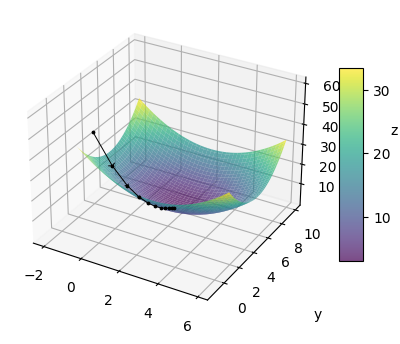

In [42]:
grad.plot_it()

Best theta found is [[1.98893941]
 [5.96132175]]
Value of f at this theta: f(theta) = [[3.00161834]]
Value of f prime at this theta: f'(theta) = [[-0.02212118]
 [-0.0773565 ]]


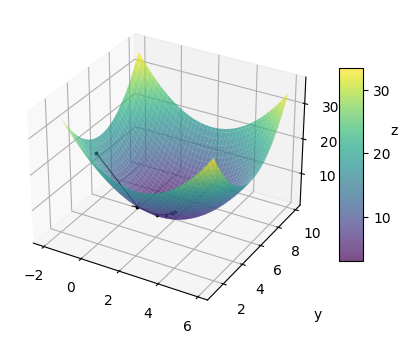

In [43]:
# try with very higher rate - converges faster so can do just 7 steps
learning_rate = 0.25
grad = GradientDescentOptimizer(f, fprime, np.random.normal(size=(2,)), learning_rate)
grad.optimize(7)
grad.print_result()
grad.plot_it()

Best theta found is [[1.99997969]
 [5.99979719]]
Value of f at this theta: f(theta) = [[3.00000004]]
Value of f prime at this theta: f'(theta) = [[-4.06184168e-05]
 [-4.05611848e-04]]


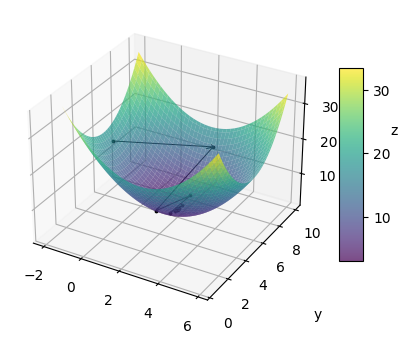

In [44]:
# try with much high rate
learning_rate = 0.8
grad = GradientDescentOptimizer(f, fprime, np.random.normal(size=(2,)), learning_rate)
grad.optimize(20)
grad.print_result()
grad.plot_it()

Best theta found is [[1.90520315]
 [5.71740912]]
Value of f at this theta: f(theta) = [[3.08884405]]
Value of f prime at this theta: f'(theta) = [[-0.18959371]
 [-0.56518175]]


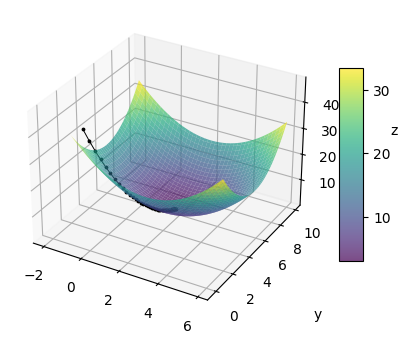

In [45]:
# try with tiny learning rate - takes too many steps to converge
learning_rate = 0.03
grad = GradientDescentOptimizer(f, fprime, np.random.normal(size=(2,)), learning_rate)
grad.optimize(50)
grad.print_result()
grad.plot_it()